# Analisi Best Model Anno 2018 Sessione 1
### Claudia Gabriela Ochoa Martinez (2020)

#### Analizzando il best model fornito dalla funzione pdredge possiamo allora applicare la funzione predict (pacchetto unmarked) per effettuare ulteriori valutazione sulla bontà del modello.

In [1]:
library(unmarked)

Loading required package: lattice



In [39]:
myunscale <- function (vals, norm.data, col.ids)  {
    cols <- if (missing(col.ids)) 1:NCOL(vals) else col.ids
    #if (length(cols) > NCOL(vals)) 
    #    stop("Incorrect dimension of data to unscale.")
    centers <- attr(norm.data, "scaled:center")[cols]
    scales <- attr(norm.data, "scaled:scale")[cols]
    unvals <- scale(subset(vals, select=cols), center = (-centers/scales), scale = 1/scales)
    unvals <- cbind(unvals,vals[,-which(names(vals) %in% cols)])
    attr(unvals, "scaled:center") <- attr(unvals, "scaled:scale") <- NULL

    return(unvals)
}

In [3]:
load('Dati-modelli\\multimodel_2018_sessione_1_EYP6.RData')

In [4]:
best_mod <- occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    dominant + MDR + 1, data = arvicole, control = list(trace = 1, 
    maxit = 1e+07))

summary(best_mod)


initial  value 272.406741 
iter  10 value 128.215019
iter  20 value 125.330854
iter  30 value 125.323124
final  value 125.323122 
converged

Call:
occu(formula = ~MDR + orario + precip + temper + vento + 1 ~ 
    dominant + MDR + 1, data = arvicole, control = list(trace = 1, 
    maxit = 1e+07))

Occupancy (logit-scale):
                 Estimate    SE      z P(>|z|)
(Intercept)        -1.172 0.550 -2.129  0.0332
dominantMuschio     1.073 0.859  1.250  0.2114
dominantOther_Sp    0.895 0.915  0.978  0.3282
MDR                -0.857 1.301 -0.658  0.5103

Detection (logit-scale):
            Estimate     SE      z P(>|z|)
(Intercept)   0.7948 1.3158  0.604 0.54580
MDR           0.4135 1.1273  0.367 0.71377
orarioTr      0.0562 0.5055  0.111 0.91151
precip       -0.3700 0.8983 -0.412 0.68042
temper       -0.2244 0.0866 -2.591 0.00957
vento        -0.3181 0.4068 -0.782 0.43424

AIC: 270.6462 
Number of sites: 70
optim convergence code: 0
optim iterations: 56 
Bootstrap iterations: 0 



In [5]:
head(siteCovs_orig$dominant)
head(siteCovs(arvicole))

[1] "Graminacee" "Graminacee" "Graminacee" "Graminacee" "Graminacee"
[6] "Graminacee"

,Diametro.roccia.1..cm.,Diametro.roccia.2..cm.,Diametro.roccia.3..cm.,alt_m,aspect_deg,slope_degr,n_species,MDR,IQR,Esp.tr,cop_veg_ottavi,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.7999612,0.4449731,0.6121266,-0.9638930,-0.03990354,-0.004945912,0.97220994,0.65969346,-0.7248291,-2.7977585,1.3660940,Graminacee
2,0.7678020,-0.7023655,0.1200460,-1.1064717,0.39997796,0.341267903,0.05432387,0.05605239,0.4943843,-1.1704790,-0.3135298,Graminacee
3,-0.9071587,0.2749970,-0.1449204,-1.1156660,0.51727969,-1.505205774,-0.33905587,-0.36649637,-0.8052168,-0.7365377,-0.3135298,Graminacee
4,-0.2639738,-0.9573296,-0.6370010,-1.1130010,0.39264660,-0.581968936,0.97220994,-1.15122977,-0.3764824,-1.1976003,1.3660940,Graminacee
5,0.6070058,-0.7236125,-0.4288130,-1.0064001,0.39997796,-0.235755121,0.70995678,-0.81922717,0.3470069,-1.1704790,-0.3135298,Graminacee
6,0.1514164,-0.9360826,-0.6370010,-0.9597622,0.51727969,-0.697373540,0.57883019,-1.15122977,0.0254561,-0.7365377,0.8062194,Graminacee


In [6]:
siti_considerati <- 70-length(best_mod@sitesRemoved) # In totale, al massimo nelle analisi consideriamo 70 siti, alcuni anni meno
re <- ranef(best_mod)
EBUP <- bup(re, stat="mean")
CI <- confint(re, level=0.90)
rbind(PAO = c(Estimate = sum(EBUP), colSums(CI))/siti_considerati)

,Estimate,5%,95%
PAO,0.3531944,0.2428571,0.8571429


,Predicted,SE,lower,upper,MDR,dominant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.5053440,0.5009079,0.01972169,0.9810881,-1.392686,Graminacee
2,0.4933295,0.4833233,0.02153000,0.9773166,-1.336590,Graminacee
3,0.4813227,0.4652567,0.02349056,0.9728248,-1.280494,Graminacee
4,0.4693374,0.4467772,0.02561331,0.9674878,-1.224398,Graminacee
5,0.4573874,0.4279565,0.02790820,0.9611641,-1.168302,Graminacee
6,0.4454862,0.4088680,0.03038491,0.9536954,-1.112207,Graminacee


[1] "MDR"
[1] 1


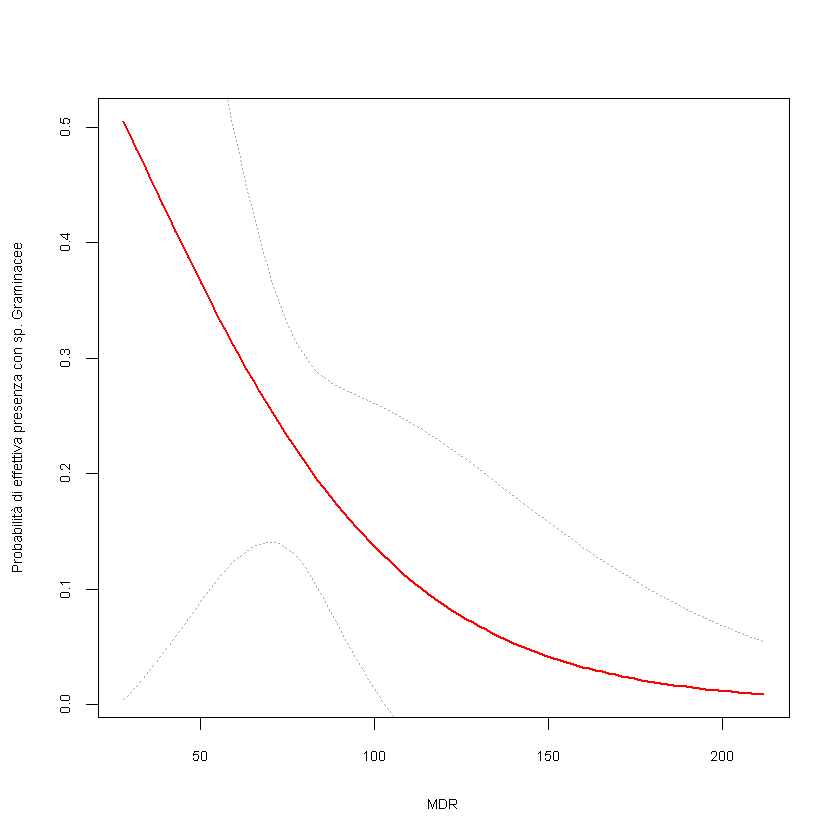

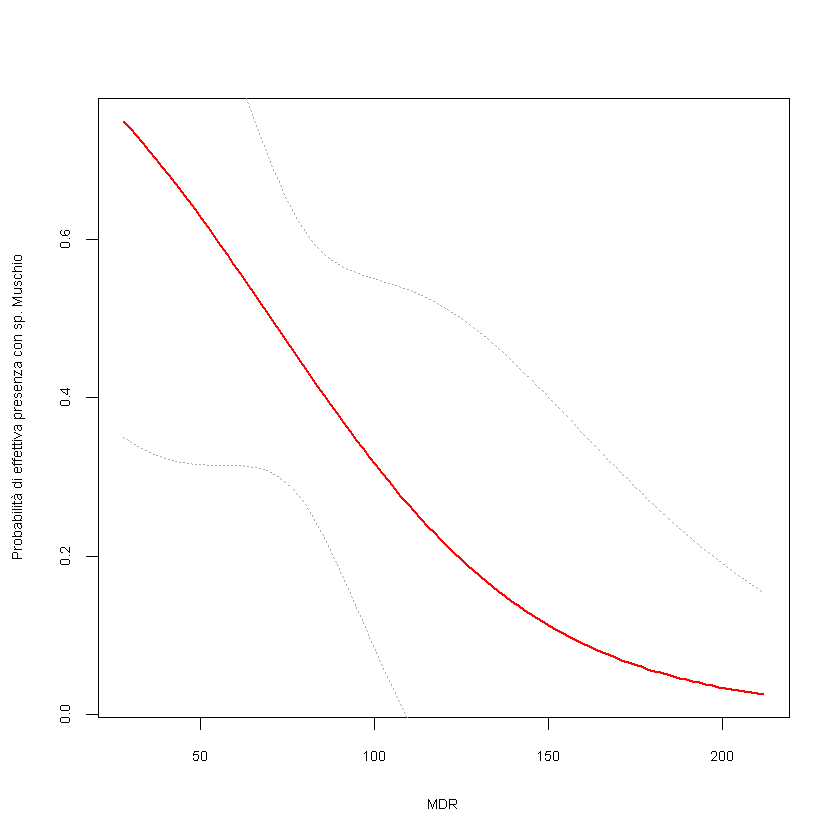

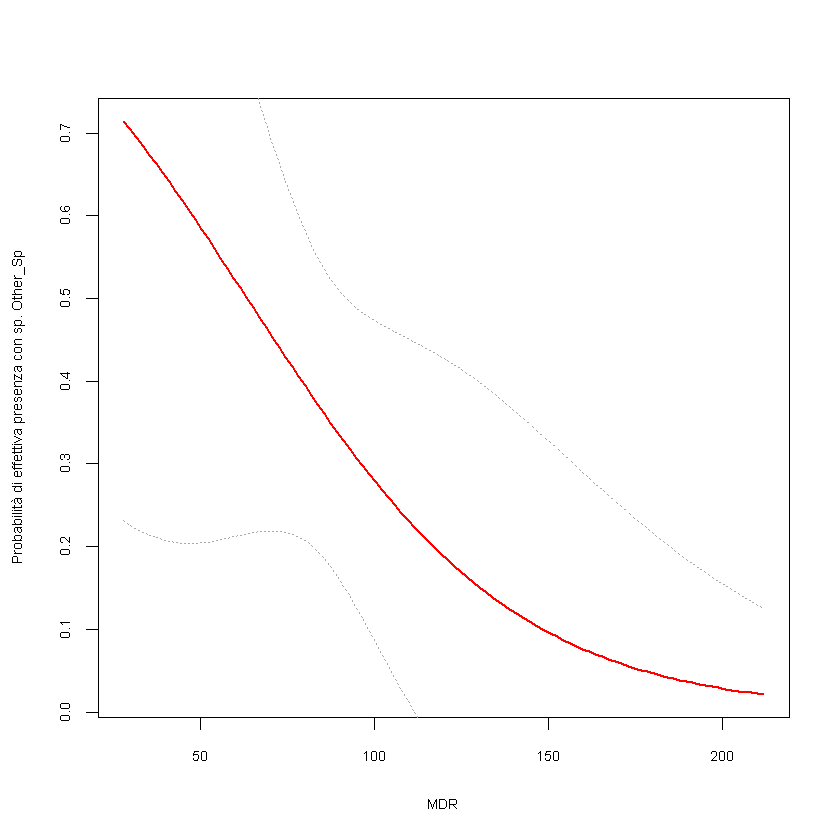

In [38]:
# FACCIAMO VARIARE MDR
df_indicato <- siteCovs(arvicole)
MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)

newdat_graminacee <- data.frame(
    MDR = MDR.seq,
    dominant = "Graminacee"
)   
newdat_muschio <- data.frame(
    MDR = MDR.seq,
    dominant = "Muschio"
)
newdat_other <- data.frame(
    MDR = MDR.seq,
    dominant = "Other_Sp"
)
newdata <- rbind(newdat_graminacee,newdat_muschio,newdat_other)
Elambda <- predict(best_mod, 
        type='state', 
        newdata = newdata,
        appendData = TRUE)
head(Elambda)
Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("MDR"))

#GRAFICI

with(subset(Elambda_unscaled,dominant=="Graminacee"), {
  plot(MDR, Predicted, xlab="MDR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Graminacee", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
   lines(MDR, Predicted+SE, lty=3, col="dark grey")
   lines(MDR, Predicted-SE, lty=3, col="dark grey")
})
with(subset(Elambda_unscaled,dominant=="Muschio"), {
  plot(MDR, Predicted, xlab="MDR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Muschio", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
   lines(MDR, Predicted+SE, lty=3, col="dark grey")
   lines(MDR, Predicted-SE, lty=3, col="dark grey")
})

with(subset(Elambda_unscaled,dominant=="Other_Sp"), {
  plot(MDR, Predicted, xlab="MDR", type="l", # names = habitat,
       ylab="Probabilità di effettiva presenza con sp. Other_Sp", #ylim=c(-20, 40), # cex.names=0.7,
       cex.lab=0.7, cex.axis=0.7, lwd=2, col="red")
   lines(MDR, Predicted+SE, lty=3, col="dark grey")
   lines(MDR, Predicted-SE, lty=3, col="dark grey")
})

### Proseguiamo con ulteriori valutazioni sulla temperatura

,MDR,Predicted,SE,lower,upper,temper,orario,vento,precip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
95,74.14286,0.02961444,0.01563905,0.010394252,0.08144983,16.95051,Tr,1.626316,0.05263158
96,74.14286,0.02904018,0.01550046,0.010080288,0.08075245,17.04040,Tr,1.626316,0.05263158
97,74.14286,0.02847674,0.01536270,0.009774683,0.08006836,17.13030,Tr,1.626316,0.05263158
98,74.14286,0.02792391,0.01522572,0.009477285,0.07939712,17.22020,Tr,1.626316,0.05263158
99,74.14286,0.02738151,0.01508947,0.009187938,0.07873830,17.31010,Tr,1.626316,0.05263158
100,74.14286,0.02684936,0.01495392,0.008906487,0.07809149,17.40000,Tr,1.626316,0.05263158


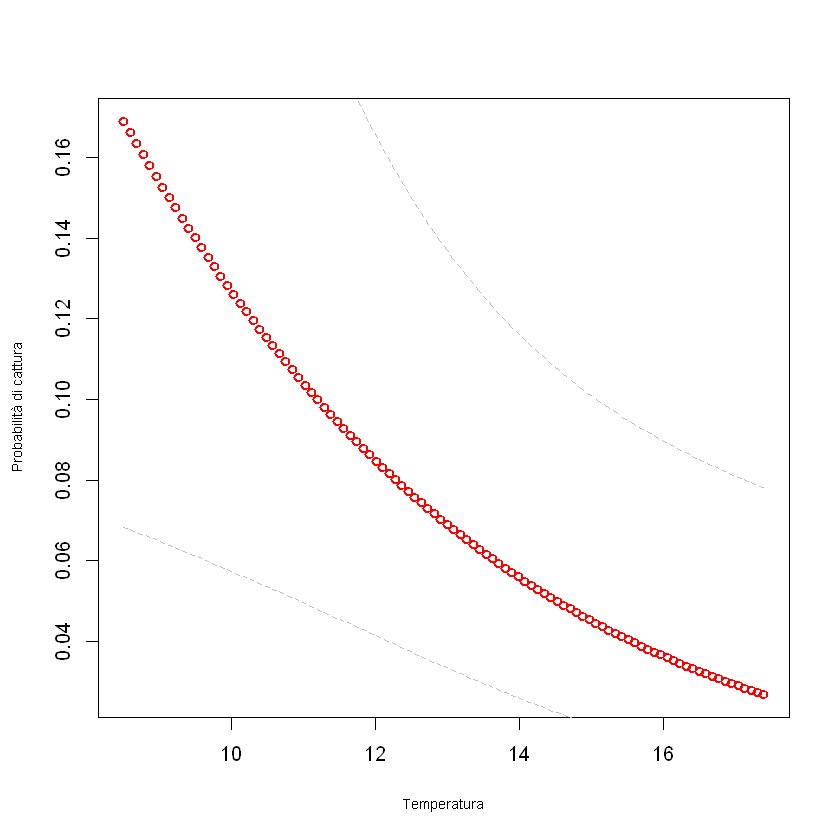

In [41]:
#### predizioni di abbondanza con valori di covariate specifici.
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)

MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    MDR = mean(df_indicato$MDR),
    temper = temper.seq,
    orario = "Tr",
    vento = mean(df_indicato2$vento),
    precip = mean(df_indicato2$precip)
)

## PREDIZIONE
Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("MDR"))
tail(Elambda_unscaled)

#GRAFICI
with(Elambda_unscaled, {
    plot(temper, Predicted, xlab="Temperatura",
        ylab="Probabilità di cattura",
        cex.lab=0.7, lwd=2, col="red")
    lines(temper, upper, lty=2, col="grey")
    lines(temper, lower,lty=2, col="grey" )
})  

,MDR,Predicted,SE,lower,upper,temper,orario,vento,precip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
95,74.14286,0.04291771,0.02968907,0.010758496,0.1560434,13.59474,Tr,2.783838,0.05263158
96,74.14286,0.04261518,0.02982202,0.010512462,0.1571797,13.59474,Tr,2.807071,0.05263158
97,74.14286,0.04231469,0.02995295,0.010271384,0.1583308,13.59474,Tr,2.830303,0.05263158
98,74.14286,0.04201623,0.03008182,0.010035198,0.1594965,13.59474,Tr,2.853535,0.05263158
99,74.14286,0.04171978,0.03020861,0.009803843,0.1606768,13.59474,Tr,2.876768,0.05263158
100,74.14286,0.04142533,0.03033330,0.009577252,0.1618715,13.59474,Tr,2.900000,0.05263158


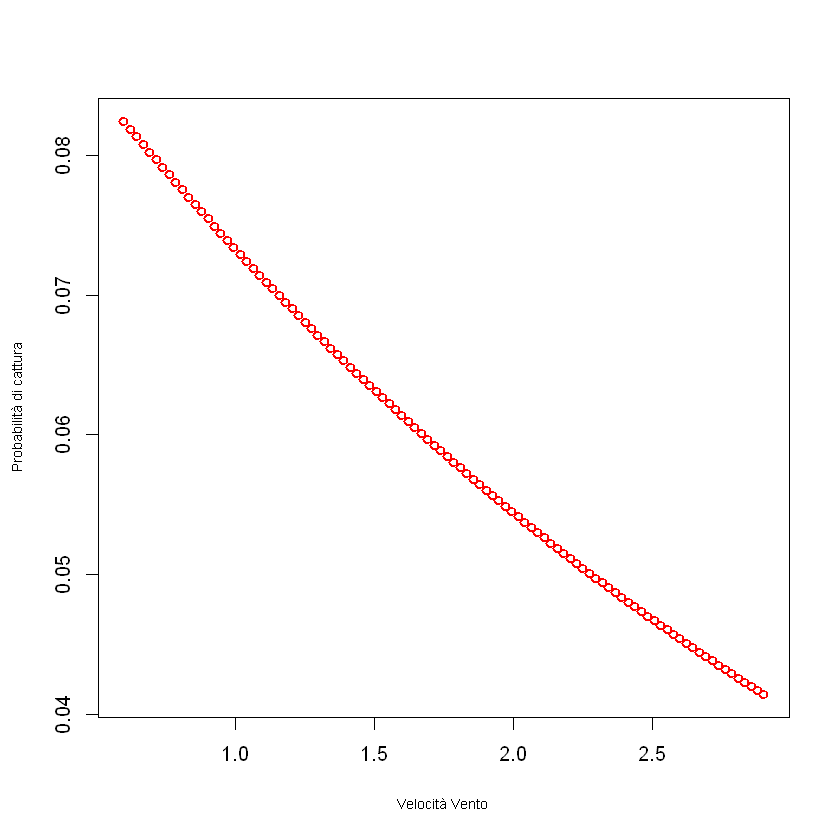

In [44]:
#### predizioni di abbondanza con valori di covariate specifici.
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)

MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    MDR = mean(df_indicato$MDR),
    temper = mean(df_indicato2$temper),
    orario = "Tr",
    vento = vento.seq,
    precip = mean(df_indicato2$precip)
)

## PREDIZIONE
Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("MDR"))
tail(Elambda_unscaled)

#GRAFICI
with(Elambda_unscaled, {
    plot(vento, Predicted, xlab="Velocità Vento",
        ylab="Probabilità di cattura",
        cex.lab=0.7, lwd=2, col="red")
    lines(vento, upper, lty=2, col="grey")
    lines(vento, lower,lty=2, col="grey" )
})  

,MDR,Predicted,SE,lower,upper,temper,orario,vento,precip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
95,74.14286,0.04443703,0.04268234,0.006442697,0.2500941,13.59474,Tr,1.626316,0.9494949
96,74.14286,0.04427861,0.04289352,0.006314430,0.2524957,13.59474,Tr,1.626316,0.9595960
97,74.14286,0.04412073,0.04310319,0.006188565,0.2549166,13.59474,Tr,1.626316,0.9696970
98,74.14286,0.04396339,0.04331135,0.006065064,0.2573569,13.59474,Tr,1.626316,0.9797980
99,74.14286,0.04380658,0.04351799,0.005943890,0.2598165,13.59474,Tr,1.626316,0.9898990
100,74.14286,0.04365030,0.04372310,0.005825005,0.2622951,13.59474,Tr,1.626316,1.0000000


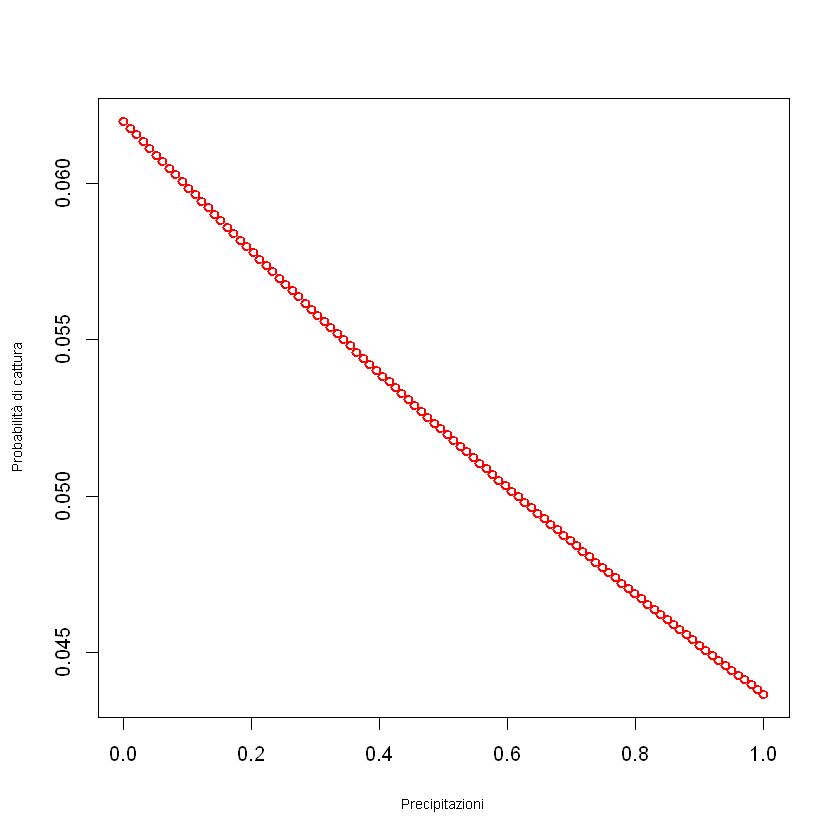

In [45]:
#### predizioni di abbondanza con valori di covariate specifici.
df_indicato <- siteCovs(arvicole)
df_indicato2 <- obsCovs(arvicole)

MDR.seq <- seq(min(df_indicato$MDR), max(df_indicato$MDR), length=100)
temper.seq <- seq(min(df_indicato2$temper), max(df_indicato2$temper), length=100)
vento.seq <- seq(min(df_indicato2$vento), max(df_indicato2$vento), length=100)
precip.seq <- seq(min(df_indicato2$precip), max(df_indicato2$precip), length=100)

newdat_tempTr <- data.frame(
    MDR = mean(df_indicato$MDR),
    temper = mean(df_indicato2$temper),
    orario = "Tr",
    vento = mean(df_indicato2$vento),
    precip = precip.seq
)

## PREDIZIONE
Elambda <- predict(best_mod, 
        type='det', 
        newdata = newdat_tempTr,
        appendData = TRUE)

Elambda_unscaled <- myunscale(Elambda, siteCovs_scaled, c("MDR"))
tail(Elambda_unscaled)

# GRAFICI

with(Elambda_unscaled, {
    plot(precip, Predicted, xlab="Precipitazioni",
        ylab="Probabilità di cattura",
        cex.lab=0.7, lwd=2, col="red")
    lines(precip, upper, lty=2, col="grey")
    lines(precip, lower,lty=2, col="grey" )
})  